In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
from tensorflow import keras
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
from tensorflow.keras.applications import Xception, ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint 

In [3]:
print("TensorFlow Version : ", tf.__version__)
print("Keras Version : ", keras.__version__)
print("Open CV Python Version :", cv2.__version__)

TensorFlow Version :  2.3.0
Keras Version :  2.4.0
Open CV Python Version : 4.1.2


In [4]:

%cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [5]:
dataFrameTrain = pd.read_csv('training.csv')

In [6]:
dataFrameTrain

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [7]:
dataFrameTrain.info(verbose=True) #gives the information of all columns in the data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [8]:
def plot_datasets(data, n_rows=10, n_cols=10, fig_size=(20,20)):
    fig, axes = plt.subplots(n_rows,n_cols,figsize = fig_size)
    axes = axes.ravel()

    data_len = len(data)

    for i in range(0,n_rows*n_cols):
        index = np.random.randint(0,data_len)
        axes[i].imshow(data['Image'][index], cmap='gray')
        for j in range(1,31,2):
            axes[i].plot(data.loc[index][j-1], data.loc[index][j], 'rx')
        #axes[i].set_title(y_train[i], fontsize = 8)
        axes[i].axis('off')

In [9]:
cleanedDataFile = 'cleanedDataFile.csv'

In [10]:
dataFrameTrain.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [11]:
dataFrameTrain.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False
7045,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False
7046,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False
7047,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False


In [12]:
dataFrameTrain = dataFrameTrain.dropna()
dataFrameTrain.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [13]:
dataFrameTrain.to_csv(cleanedDataFile, encoding='utf-8', index=False)


In [14]:
cleanedDataFrame = pd.read_csv(cleanedDataFile)

In [15]:
cleanedDataFrame

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,24.972418,36.348203,56.402841,31.171586,80.709708,30.595738,38.187845,30.595738,17.275454,29.534964,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,15.979592,38.076531,56.941270,29.605102,81.314059,30.754762,35.059410,29.566780,8.578912,32.096032,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,21.621652,39.095524,62.388142,32.089787,85.829396,38.724104,42.595762,30.541779,11.230184,34.485512,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,16.850204,44.409861,51.463469,27.161327,77.354898,19.562755,34.135510,32.830102,9.731633,41.152347,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [16]:
cleanedDataFrame['Image'] = cleanedDataFrame['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep = ' '))
cleanedDataFrame['Image'] = cleanedDataFrame['Image'].apply(lambda x: x.reshape(96,96))

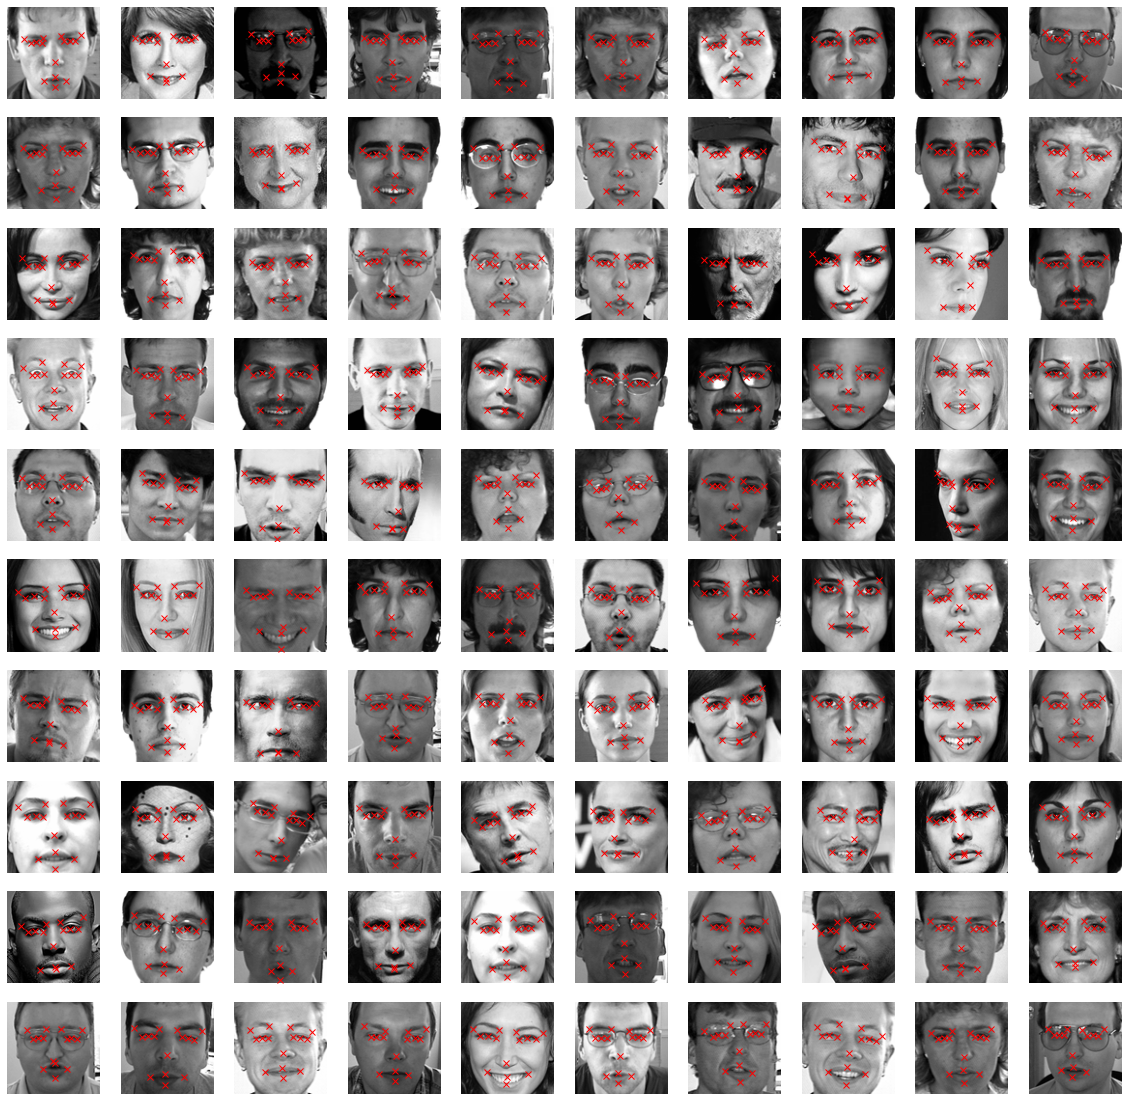

In [17]:
plot_datasets(cleanedDataFrame)

In [18]:

del dataFrameTrain

In [19]:
labels = []
for i in range(len(cleanedDataFrame)):
    labels_temp = []
    for j in range(len(cleanedDataFrame.loc[0])-1):
        labels_temp.append(cleanedDataFrame.loc[i][j])
    labels.append(labels_temp)
    


In [24]:
images = cleanedDataFrame['Image']
images = images/255.0
X = np.empty((len(images), 96, 96, 1))
for i in range(len(images)):
    X[i,:] = np.expand_dims(images[i], axis=2)

X = np.asarray(X).astype(np.float32)

print(X.shape)

(2140, 96, 96, 1)


In [25]:
Y = np.asarray(labels).astype(np.float32)
print(Y.shape)

(2140, 30)


In [26]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same", kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01))(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same", kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01))(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same", kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01))(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out



In [107]:
def create_neural_net(nb_class = 10):
    
    inputs = Input(shape=(96, 96, 1))
    num_filters = 32
    hidden_dims = 2048
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same", kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01))(t)
    t = relu_bn(t)
    
    num_blocks_list = [2,5,2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    t = Dense(hidden_dims, activation='relu', name='fc6', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01))(t)
    t = BatchNormalization()(t)
    t = Dropout(0.3)(t)
    t = Dense(hidden_dims/2, activation='relu', name='fc7', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                              activity_regularizer=tf.keras.regularizers.l2(0.01))(t)
    t = BatchNormalization()(t)
    t = Dropout(0.5)(t)
    outputs = Dense(nb_class, activation='relu')(t)
    
    model = Model(inputs, outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.0065)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['accuracy']
    )

    return model

In [108]:
def create_model(optimizer='adam'):
    model = keras.models.Sequential()
    model.add(Conv2D(16, kernel_size=2, padding='same', input_shape=(96, 96,1), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(30, activation='tanh'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return model

In [109]:
resNet_Model = create_neural_net(30)
#resNet_Model = create_model()


In [110]:
resNet_Model.summary()


Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization_224 (BatchN (None, 96, 96, 1)    4           input_15[0][0]                   
__________________________________________________________________________________________________
conv2d_208 (Conv2D)             (None, 96, 96, 32)   320         batch_normalization_224[0][0]    
__________________________________________________________________________________________________
re_lu_184 (ReLU)                (None, 96, 96, 32)   0           conv2d_208[0][0]                 
______________________________________________________________________________________

In [111]:
checkpoints = ModelCheckpoint(filepath='facial_keypoints_weights.h5', verbose=1, 
                               save_best_only=True)

In [112]:
history = resNet_Model.fit( x=X, y=Y, batch_size=256,
    epochs=100,
    validation_split=0.2,
    callbacks=[checkpoints],
    verbose=1, 
    shuffle=True)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 4215.5791 - accuracy: 0.1268
Epoch 00001: val_loss improved from inf to 378066.06250, saving model to facial_keypoints_weights.h5
7/7 [==============================] - 8s 1s/step - loss: 4215.5791 - accuracy: 0.1268 - val_loss: 378066.0625 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 3332.0042 - accuracy: 0.2664
Epoch 00002: val_loss did not improve from 378066.06250
7/7 [==============================] - 7s 971ms/step - loss: 3332.0042 - accuracy: 0.2664 - val_loss: 1448429056.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 2799.4854 - accuracy: 0.3569
Epoch 00003: val_loss did not improve from 378066.06250
7/7 [==============================] - 7s 994ms/step - loss: 2799.4854 - accuracy: 0.3569 - val_loss: 59354719977472.0000 - val_accuracy: 0.3995
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 2496

In [113]:
test_dataFrame = pd.read_csv('test.csv')

In [114]:
test_dataFrame['Image'] = test_dataFrame['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep = ' '))
test_dataFrame['Image'] = test_dataFrame['Image'].apply(lambda x: x.reshape(96,96))

In [118]:
test_images = cleanedDataFrame['Image']
test_images = test_images/255.0
X_test = np.empty((len(test_images), 96, 96, 1))
for i in range(len(test_images)):
    X_test[i,:] = np.expand_dims(test_images[i], axis=2)

X_test = np.asarray(X_test).astype(np.float32)

print(X_test.shape)

(2140, 96, 96, 1)


In [120]:
predict_out = resNet_Model.predict(X_test)

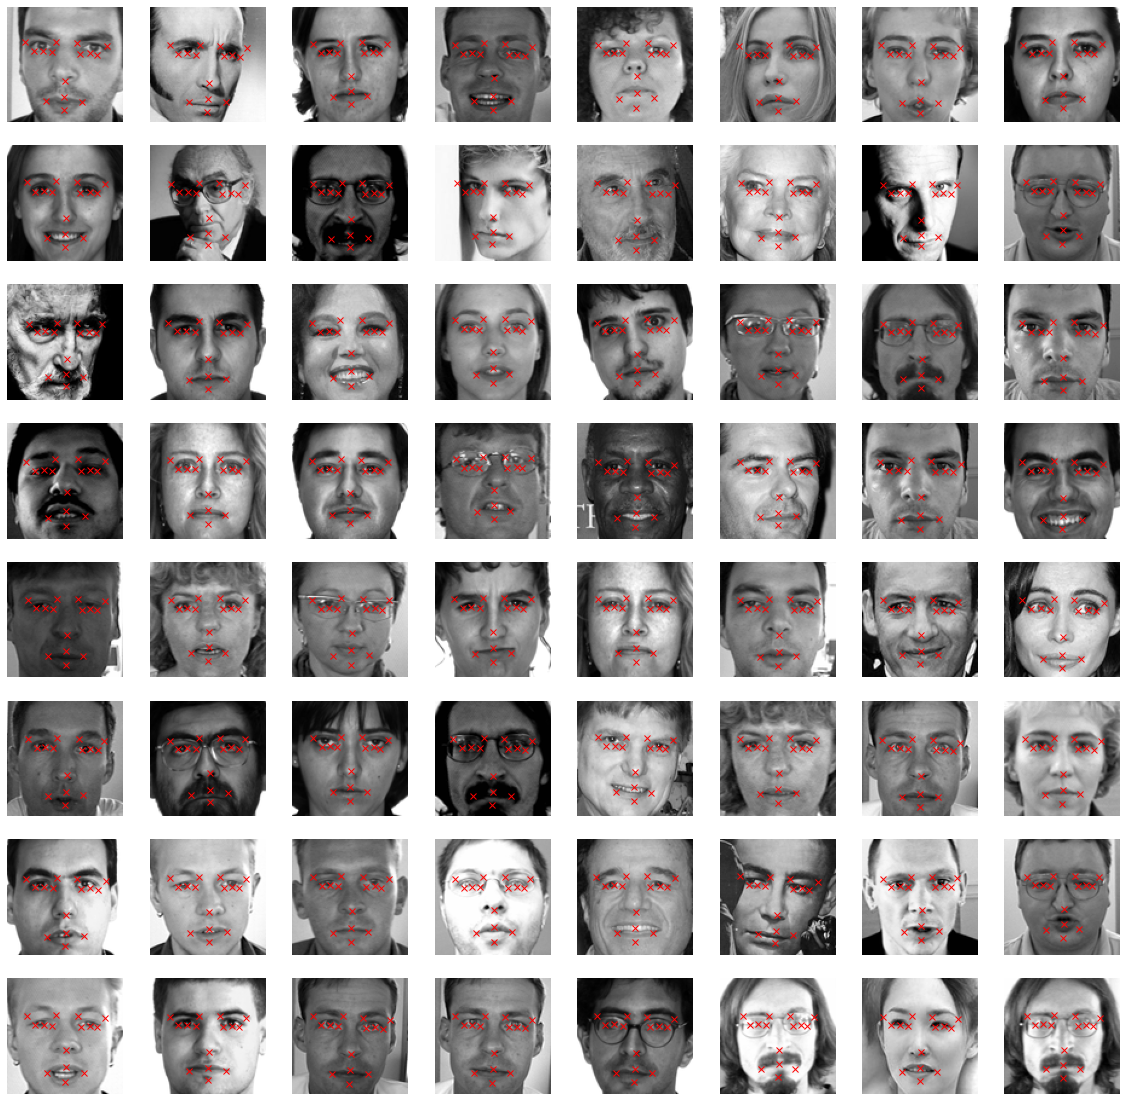

In [128]:
n_rows, n_cols = 8,8
fig, axes = plt.subplots(n_rows,n_cols,figsize = (20,20))
axes = axes.ravel()

for i in range(0,n_rows*n_cols):
  index = np.random.randint(0,len(X_test))
  axes[i].imshow(test_images[index], cmap='gray')
  for j in range(1,31,2):
    axes[i].plot(predict_out[index][j-1], predict_out[index][j], 'rx')
    #axes[i].set_title(y_train[i], fontsize = 8)
  axes[i].axis('off')

In [126]:
predict_out[0]

array([68.05107 , 39.18602 , 30.580767, 37.877354, 60.764977, 39.89716 ,
       74.08479 , 40.32902 , 37.418682, 38.77193 , 23.323303, 38.14976 ,
       58.004963, 31.274923, 80.28741 , 33.03451 , 40.735615, 30.388119,
       16.354477, 30.868912, 48.412693, 61.08608 , 62.281498, 77.91356 ,
       32.436176, 77.90731 , 47.792812, 74.59993 , 47.32879 , 85.61398 ],
      dtype=float32)

In [127]:
predict_out[1]

array([67.241234, 37.75193 , 30.33454 , 36.025185, 59.624958, 38.325123,
       71.869705, 38.802902, 36.733337, 37.1252  , 23.522276, 36.213943,
       57.1254  , 29.50883 , 79.78069 , 31.558374, 40.259796, 28.677725,
       16.767513, 28.556715, 47.293686, 58.609356, 60.191338, 75.464134,
       32.03345 , 74.897545, 46.86842 , 70.59641 , 46.13785 , 81.870865],
      dtype=float32)